$U(Q_1,Q_2) = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + C Q_1 Q_2^2$

Create a Jupyter Notebook which defines the energy above and plots in two side-by-side panels:

- Plot $U(Q_1,Q_2)$ with $Q_1$ on the horizonal axis and $Q_2=0$
- Add several lines with fixed positive and negative values of $Q_2$ chosen to explore the possible effect of $Q_2$ on $Q_1$
- Add a second panel which plots $U(Q_1,Q_2)$
- Add an `ipywidgets` environment so that you can explore what different values of $K_1$, $K_2$, and $C$ does to your plot.
- Make sure that your axes are labeled and that you have a plot legend, if appropriate.

### Explore the physics
After tinkering with your plots, answer the following questions:

1. As you increase $C$, how do the low-energy contours start to change?
2. Does the force on $Q_1$ depend on the direction of $Q_2$?
3. What do you expect the influence of driving $Q_2$ to be on the motion of $Q_1$?
3. If $Q_1$ is kicked away from equilibrium, what do you expect its influence to be on $Q_2$?


In [140]:
# Import the enecessary packages
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [141]:
# Define the potential energy
def potential_energy(Q1, Q2, K1=1, K2=1, C=0.5):
    return 0.5*K1*Q1**2 + 0.5*K2*Q2**2 + C*Q1*Q2**2  # K1 and K2 are spring constants

# Test the function
# potential_energy(1,2)

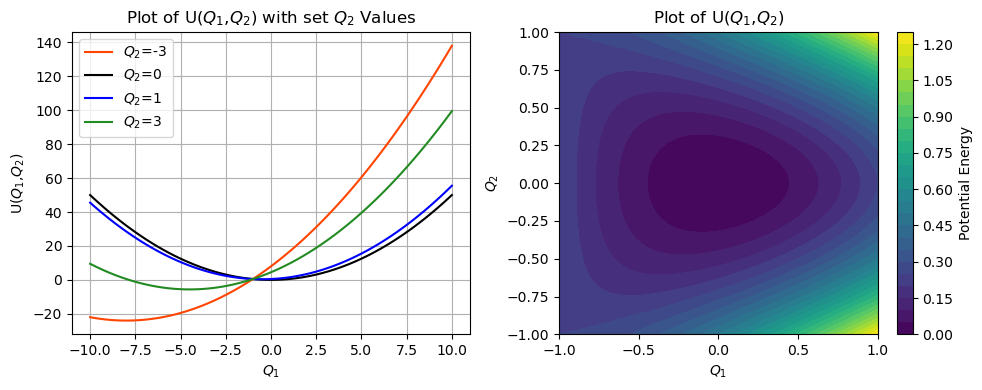

In [142]:
# plot contours with matplotlib contourf
plt.figure(figsize=(10, 4)) # Sizing the plot

plt.subplot(1, 2, 1)  # 2 rows, 1 column, first plot
Q1 = np.linspace(-10, 10, 100)

Z_neg4 = potential_energy(Q1, -4, K1=1, K2=1, C=0.5)
plt.plot(Q1, Z_neg4, label='$Q_2$=-3', color='orangered')
Z_0 = potential_energy(Q1, 0, K1=1, K2=1, C=0.5)
plt.plot(Q1, Z_0, label='$Q_2$=0', color='black')
Z_pos1 = potential_energy(Q1, 1, K1=1, K2=1, C=0.5)
plt.plot(Q1, Z_pos1, label='$Q_2$=1', color='blue')
Z_pos3 = potential_energy(Q1, 3, K1=1, K2=1, C=0.5)
plt.plot(Q1, Z_pos3, label='$Q_2$=3', color='forestgreen')

# Add gridlines
plt.grid(True)

plt.title('Plot of U($Q_1$,$Q_2$) with set $Q_2$ Values', fontsize=12)
plt.xlabel('$Q_1$')
plt.ylabel('U($Q_1$,$Q_2$)')

plt.legend(fontsize=10)

# Define the meshes and meshgrid
q1 = np.linspace(-1,1,100)
q2 = q1
Q1, Q2 = np.meshgrid(q1, q2)

plt.subplot(1, 2, 2)  # 2 rows, 1 column, second plot
contourf = plt.contourf(Q1, Q2, potential_energy(Q1, Q2, K1=0.5, K2=1, C=0.5), levels=25, cmap='viridis')

cbar = plt.colorbar(contourf)  # Add a color bar
cbar.set_label('Potential Energy')

plt.xlim([-1,1])
plt.ylim([-1,1])
plt.title('Plot of U($Q_1$,$Q_2$)', fontsize=12)
plt.xlabel('$Q_1$')
plt.ylabel('$Q_2$')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


In [143]:
# define plotting function
def plot_potential(K1=1.0, K2=1.0, C=0, n_contours=10, n_points=50):
    
    # define meshes in Q1 and Q2 and meshgrid for plotting
    q1 = np.linspace(-1,1, n_points)
    q2 = q1
    Q1, Q2 = np.meshgrid(q1, q2)
    Z = potential_energy(Q1, Q2, K1, K2, C)

    # construct contour plot
    plt.figure(figsize=(5,4)) #sizing plot
    plt.contourf(Q1, Q2, potential_energy(Q1, Q2, Z), levels=n_contours, cmap='plasma')
    plt.colorbar(label='Potential Energy')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.title('Contour Plot of U($Q_1$,$Q_2$)', fontsize=14)
    plt.xlabel('$Q_1$')
    plt.ylabel('$Q_2$')
    
    plt.show()


In [144]:
# Interactive plot
widgets.interact(plot_potential,
                K1= widgets.FloatSlider(value=1.0, min=0.0, max=3.0, step=0.05, description='K1'),
                K2= widgets.FloatSlider(value=1.0, min=0.0, max=3.0, step=0.05, description='K2'),
                C= widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.05, description='C'),
                n_contours=widgets.IntSlider(value=15, min=1, max=30, step=1, description='# Contours'),
                n_points=widgets.IntSlider(value=50, min=1, max=100, step=1, description='# Points'));

interactive(children=(FloatSlider(value=1.0, description='K1', max=3.0, step=0.05), FloatSlider(value=1.0, des…

### Answers to Questions 

1. As you increase $C$, how do the low-energy contours start to change?  
As $C$ increases, the low-energy contours start to shift towards $Q_2$. This shows there is an increase in potential energy for the coupled oscillators.

2. Does the force on $Q_1$ depend on the direction of $Q_2$?  
The force acting on $Q_1$ does depend on the direction of $Q_2$. The $C Q_1 Q_2^2$ part of the potential energy equation show their relationship. 

3. What do you expect the influence of driving $Q_2$ to be on the motion of $Q_1$?  
If $Q_2$ is increased, then $Q_1$ would also increase. This comes from the relationship between $Q_1$ and $Q_2$, which is given to us in the potentail energy equation.

4. If $Q_1$ is kicked away from equilibrium, what do you expect its influence to be on $Q_2$?  
$Q_2$ can either be pushed or pulled away from equilibrium, depending on what is done to $Q_1$. 